In [1825]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from uncertainties import *
from uncertainties.umath import *

In [1826]:
#Reading data

deg = pd.read_excel('data/deg.xlsx')

MOhm_max = pd.read_csv('data/1MOhm.max', sep='\s+', header=None)
kOhm_max = pd.read_csv('data/1kOhm.max', sep='\s+', header=None)
MOhm = pd.read_csv('data/1MOhm.dat', sep='\s+', header=None)
kOhm = pd.read_csv('data/1kOhm.dat', sep='\s+', header=None)

Ohm_20 = pd.read_csv('data/20Ohm.max', sep='\s+', header=None)
Ohm_40 = pd.read_csv('data/40Ohm.max', sep='\s+', header=None)
Ohm_60 = pd.read_csv('data/60Ohm.max', sep='\s+', header=None)
Ohm_80 = pd.read_csv('data/80Ohm.max', sep='\s+', header=None)
Ohm_100 = pd.read_csv('data/100Ohm.max', sep='\s+', header=None)
Ohm_120 = pd.read_csv('data/120Ohm.max', sep='\s+', header=None)
Ohm_150 = pd.read_csv('data/150Ohm.max', sep='\s+', header=None)
Ohm_200 = pd.read_csv('data/200Ohm.max', sep='\s+', header=None)

In [1827]:
# Constants and values

L = 1.7 #m
N = 1000 
R_C = 40 #Ohm

g = 9.80998 #m/s^2
mu_0 = 4*np.pi*10**(-7) #N/A^2

In [1828]:
# Calculation 

deg['dt'] = deg['t_max'] - deg['t_min']
deg['U_max'] = (deg['U'] - deg['U_min'])/2
deg['v_max'] = 2*np.sqrt(g*L)*np.sin(np.radians(deg['deg']/2))
# print(deg)

Ohm_20['U_ind'] = Ohm_20[2] * ((20+R_C)/(20))
Ohm_40['U_ind'] = Ohm_40[2] * ((40+R_C)/(40))
Ohm_60['U_ind'] = Ohm_60[2] * ((60+R_C)/(60))
Ohm_80['U_ind'] = Ohm_80[2] * ((80+R_C)/(80))
Ohm_100['U_ind'] = Ohm_100[2] * ((100+R_C)/(100))
Ohm_120['U_ind'] = Ohm_120[2] * ((120+R_C)/(120))
Ohm_150['U_ind'] = Ohm_150[2] * ((150+R_C)/(150))
Ohm_200['U_ind'] = Ohm_200[2] * ((200+R_C)/(200))

In [1829]:
# Define the polynomial function

def polynomial_fit(values, A):
    return A/values

# Use curve_fit to find the parameters A
initial_guess = [0.02]  # Initial guess for parameters A
params, covariance = curve_fit(polynomial_fit, deg['v_max'], deg['dt'], p0=initial_guess)

# Extract the optimized parameters
a_optimized = params
a_error = np.sqrt(np.diag(covariance))

a_comb = ufloat(a_optimized, a_error)

# Print the optimized parameters
print('a =', a_comb*10**(3), 'mm')

#Best-fit line

v_val = np.linspace(0.13, 0.8, 1000)

v_fit = polynomial_fit(v_val , a_optimized)


a = 20.97+/-0.31 mm


In [1830]:
# Define the polynomial function

def polynomial_fit(values, A):
    return A/values

# Use curve_fit to find the parameters A
initial_guess = [0.02]  # Initial guess for parameters A
params, covariance = curve_fit(polynomial_fit, deg['deg'], deg['dt'], p0=initial_guess)

# Extract the optimized parameters
A_optimized = params
A_error = np.sqrt(np.diag(covariance))

A_comb = ufloat(A_optimized, A_error)

# Print the optimized parameters
print('A =', A_comb*10**(3), 'deg s')

#Best-fit line

deg_val = np.linspace(1.8, 11, 1000)

deg_fit = polynomial_fit(deg_val , A_optimized)


A = 294+/-4 deg s


In [1831]:
#Calculate linear regression

slope, intercept, r_value, p_value, std_err = stats.linregress(deg['deg'], deg['U_max'])
k = ufloat(slope, std_err)

print(f'k =', k, 'V/deg')

#Best fit line 
u_fit = slope * np.array(deg['deg']) + intercept

m = ((25*np.sqrt(5))/24) * ((k*a_comb**2)/(N*mu_0*np.sqrt(g*L))) * ufloat(53.2,2.3)

print(f'm =', m, 'Am^2')

k = 0.1266+/-0.0015 V/deg
m = 1.34+/-0.07 Am^2


In [1832]:
# Define the polynomial function

def polynomial_fit(values, A, B):
    return A * np.exp(-B * values)

# Use curve_fit to find the parameters A and B
initial_guess = [1.5, 0.02]  # Initial guess for parameters A and B
params, covariance = curve_fit(polynomial_fit, MOhm_max[1], MOhm_max[2], p0=initial_guess)

# Extract the optimized parameters
A_optimized, B_optimized = params
A_error, B_error = np.sqrt(np.diag(covariance))

U_M_0 = ufloat(A_optimized, A_error)
beta_M_ohm = ufloat(B_optimized, B_error)

# Print the optimized parameters
print('U_M_0 =', U_M_0, 'V')
print('beta_M_ohm =', beta_M_ohm, 's^-1')

#Best-fit line

MOhm_fit = polynomial_fit(MOhm_max[1], A_optimized, B_optimized)


U_M_0 = 1.163+/-0.004 V
beta_M_ohm = 0.01451+/-0.00008 s^-1


In [1833]:
# Define the polynomial function

def polynomial_fit(values, A, B):
    return A * np.exp(-B * values)

# Use curve_fit to find the parameters A and B
initial_guess = [1.5, 0.02]  # Initial guess for parameters A and B
params, covariance = curve_fit(polynomial_fit, kOhm_max[1], kOhm_max[2], p0=initial_guess)

# Extract the optimized parameters
A_optimized, B_optimized = params
A_error, B_error = np.sqrt(np.diag(covariance))

U_M_0 = ufloat(A_optimized, A_error)
beta_k_ohm = ufloat(B_optimized, B_error)

# Print the optimized parameters
print('U_M_0 =', U_M_0, 'V')
print('beta_k_ohm =', beta_k_ohm, 's^-1')

#Best-fit line

kOhm_fit = polynomial_fit(kOhm_max[1], A_optimized, B_optimized)


U_M_0 = 1.161+/-0.009 V
beta_k_ohm = 0.02452+/-0.00031 s^-1


In [1834]:
#Calculate linear regression

slope, intercept, r_value, p_value, std_err = stats.linregress(Ohm_20[0], Ohm_20['U_ind'])
alpha_20 = ufloat(slope, std_err)
print(f'alpha_20 =', alpha_20, 'V/s')
alpha_20_fit = slope * np.array(Ohm_20[0]) + intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(Ohm_40[0], Ohm_40['U_ind'])
alpha_40 = ufloat(slope, std_err)
print(f'alpha_40 =', alpha_40, 'V/s')
alpha_40_fit = slope * np.array(Ohm_40[0]) + intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(Ohm_60[0], Ohm_60['U_ind'])
alpha_60 = ufloat(slope, std_err)
print(f'alpha_60 =', alpha_60, 'V/s')
alpha_60_fit = slope * np.array(Ohm_60[0]) + intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(Ohm_80[0], Ohm_80['U_ind'])
alpha_80 = ufloat(slope, std_err)
print(f'alpha_80 =', alpha_80, 'V/s')
alpha_80_fit = slope * np.array(Ohm_80[0]) + intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(Ohm_100[0], Ohm_100['U_ind'])
alpha_100 = ufloat(slope, std_err)
print(f'alpha_100 =', alpha_100, 'V/s')
alpha_100_fit = slope * np.array(Ohm_100[0]) + intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(Ohm_120[0], Ohm_120['U_ind'])
alpha_120 = ufloat(slope, std_err)
print(f'alpha_120 =', alpha_120, 'V/s')
alpha_120_fit = slope * np.array(Ohm_120[0]) + intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(Ohm_150[0], Ohm_150['U_ind'])
alpha_150 = ufloat(slope, std_err)
print(f'alpha_150 =', alpha_150, 'V/s')
alpha_150_fit = slope * np.array(Ohm_150[0]) + intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(Ohm_200[0], Ohm_200['U_ind'])
alpha_200 = ufloat(slope, std_err)
print(f'alpha_200 =', alpha_200, 'V/s')
alpha_200_fit = slope * np.array(Ohm_200[0]) + intercept

alpha_list = [-alpha_20.nominal_value**(-1), -alpha_40.nominal_value**(-1), -alpha_60.nominal_value**(-1), -alpha_80.nominal_value**(-1), -alpha_100.nominal_value**(-1), -alpha_120.nominal_value**(-1), -alpha_150.nominal_value**(-1), -alpha_200.nominal_value**(-1)]
R_list = [20, 40, 60, 80, 100, 120, 150, 200]

slope, intercept, r_value, p_value, std_err = stats.linregress(R_list, alpha_list)
A = ufloat(slope, std_err)
print(f'A =', A, 'V/s')

R_values = np.linspace(-75.8, 200, 1000)

A_fit = slope * R_values + intercept

alpha_20 = -0.1544+/-0.0025 V/s
alpha_40 = -0.1119+/-0.0024 V/s
alpha_60 = -0.0810+/-0.0012 V/s
alpha_80 = -0.0714+/-0.0011 V/s
alpha_100 = -0.0629+/-0.0011 V/s
alpha_120 = -0.0554+/-0.0009 V/s
alpha_150 = -0.0496+/-0.0007 V/s
alpha_200 = -0.0416+/-0.0007 V/s
A = 0.097+/-0.006 V/s


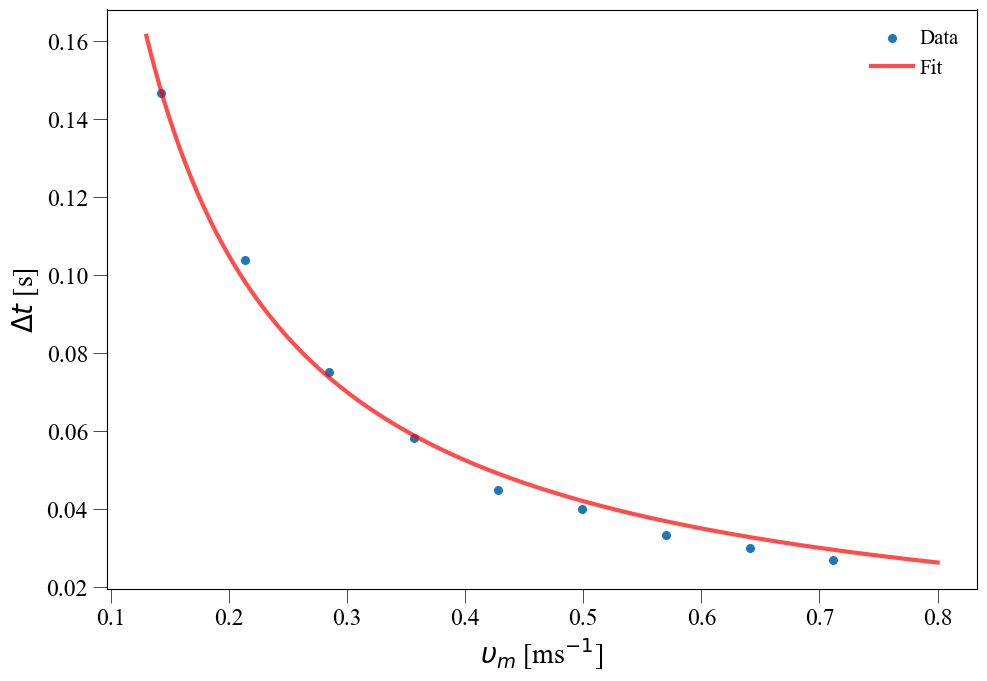

In [1835]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\upsilon_m$ [ms$^{-1}$]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$\Delta t$ [s]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(deg['v_max'], deg['dt'], color=colors[5], marker='o', s=30, label='Data')
ax.plot(v_val, v_fit, color='red', linewidth=3, label='Fit', alpha=0.7)

handles, labels = ax.get_legend_handles_labels()
order = [0,1]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/t_v.png', bbox_inches='tight')

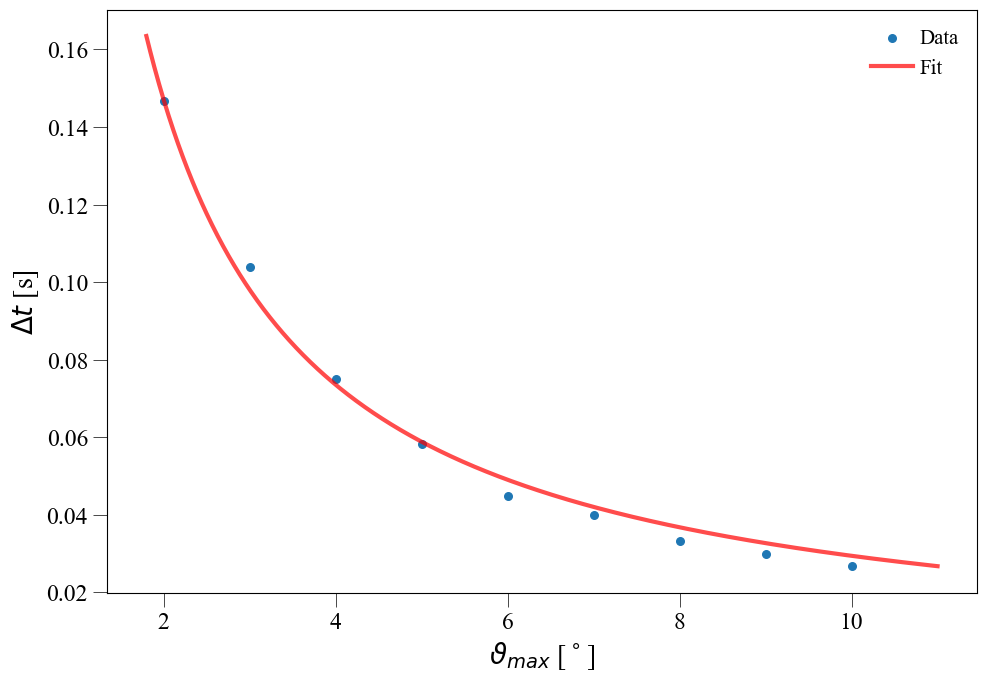

In [1836]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\vartheta_{max}$ [$^\circ$]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$\Delta t$ [s]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(deg['deg'], deg['dt'], color=colors[5], marker='o', s=30, label='Data')
ax.plot(deg_val, deg_fit, color='red', linewidth=3, label='Fit', alpha=0.7)

handles, labels = ax.get_legend_handles_labels()
order = [0,1]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/t_u.png', bbox_inches='tight')

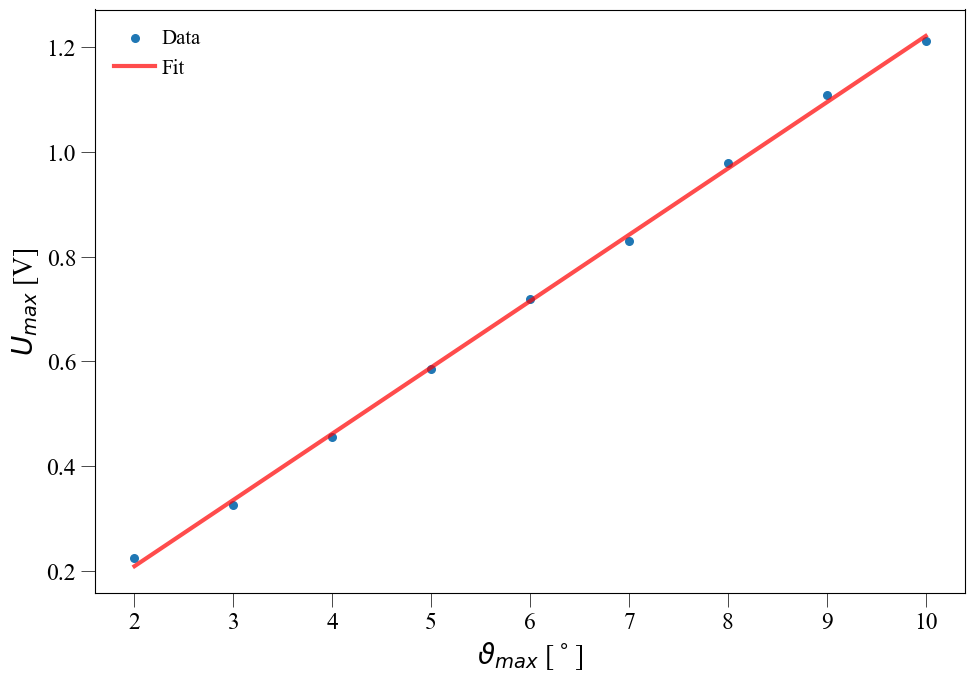

In [1837]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\vartheta_{max}$ [$^\circ$]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$U_{max}$ [V]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(deg['deg'], deg['U_max'], color=colors[5], marker='o', s=30, label='Data')
ax.plot(deg['deg'], u_fit, color='red', linewidth=3, label='Fit', alpha=0.7)

handles, labels = ax.get_legend_handles_labels()
order = [0,1]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper left", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/u_u.png', bbox_inches='tight')

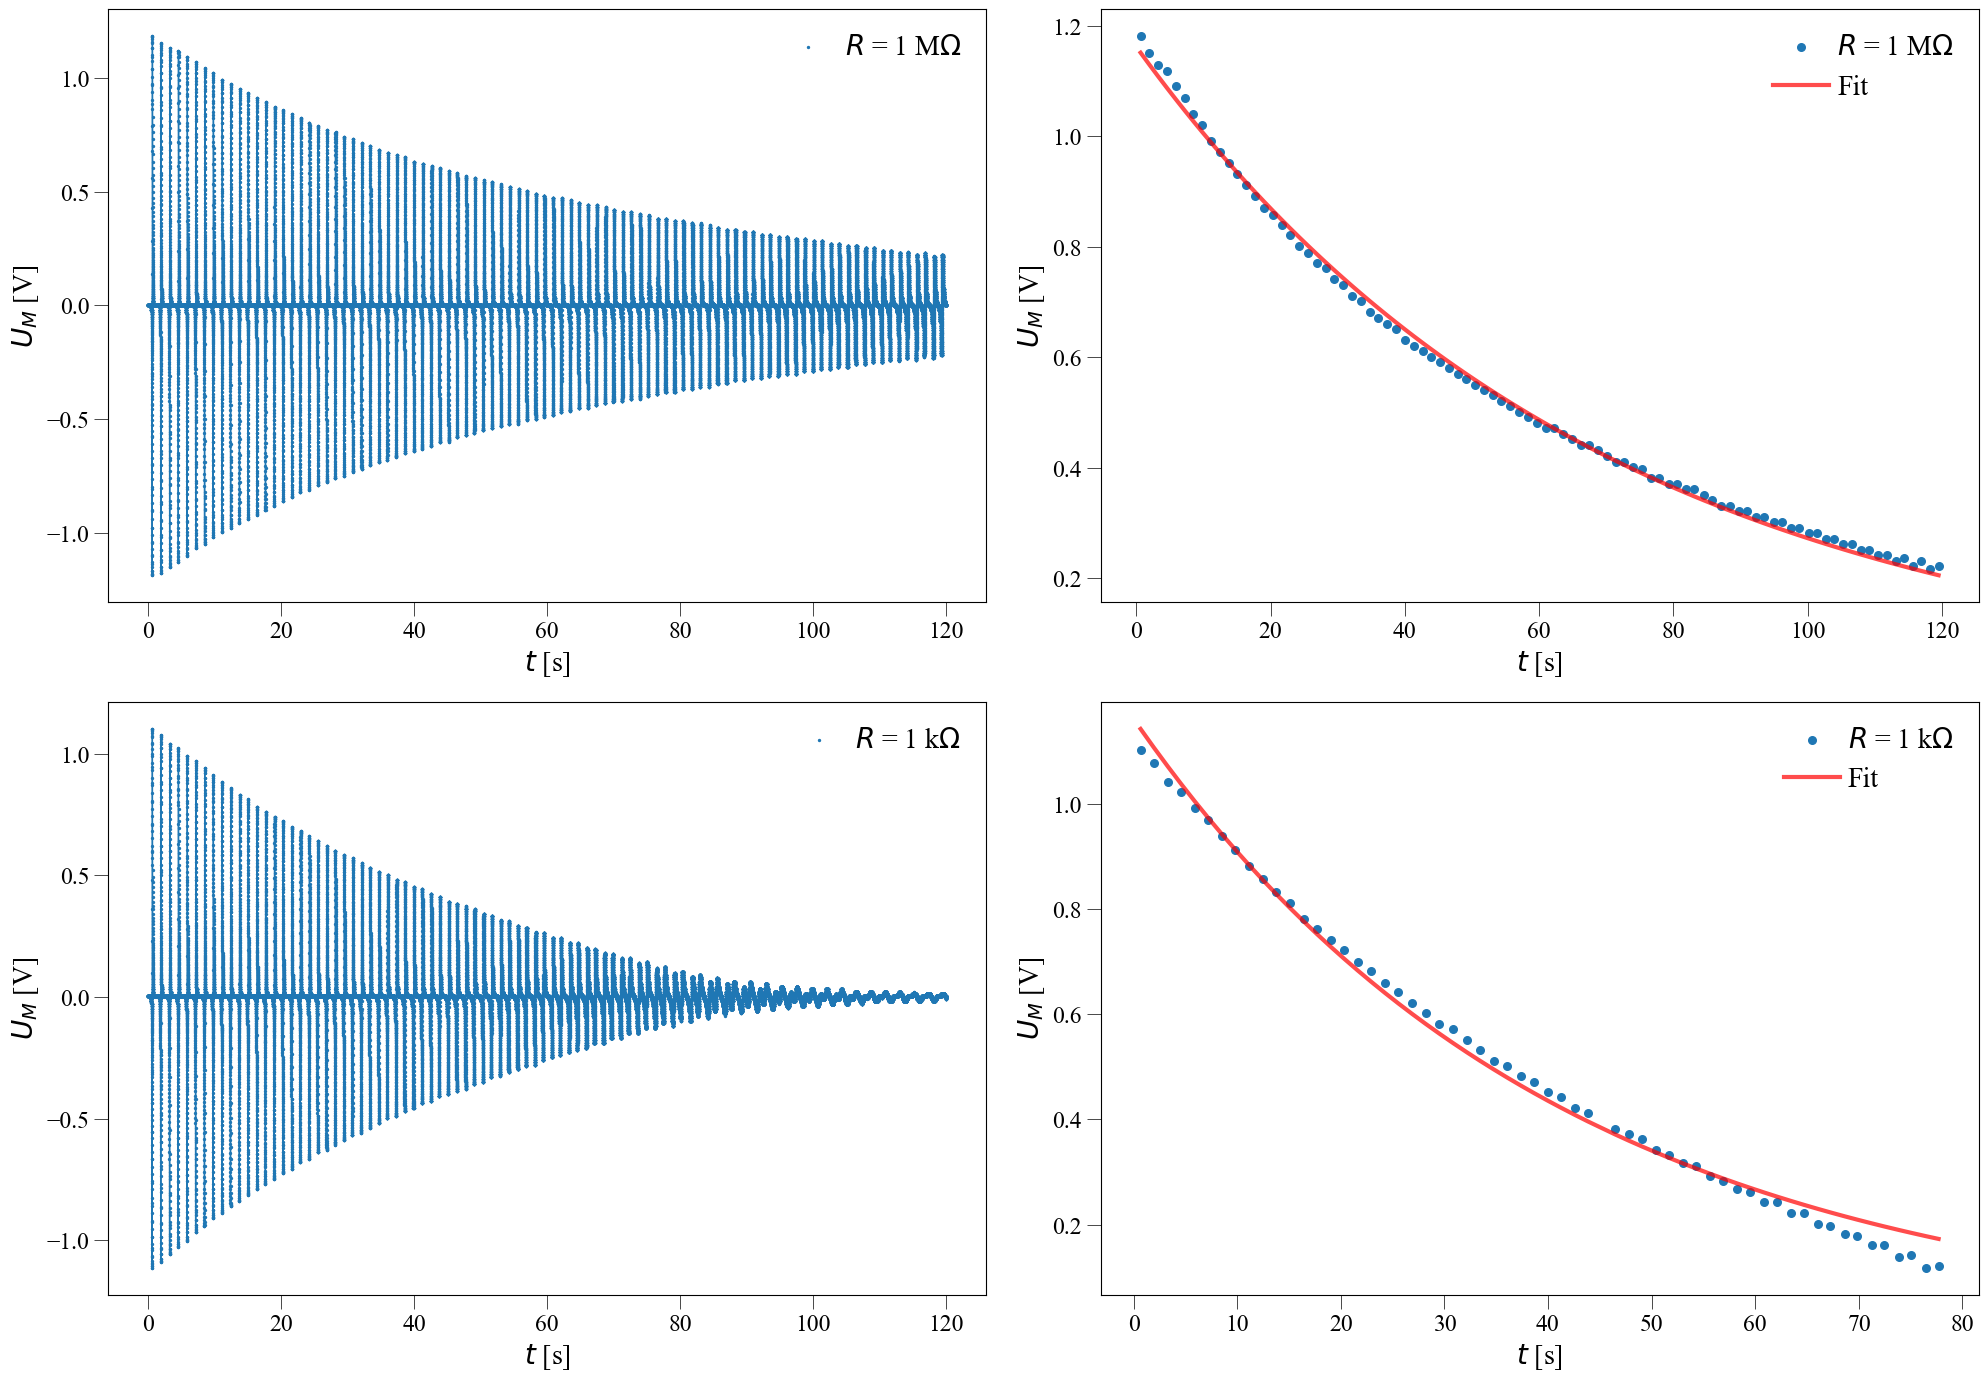

In [1838]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,14), sharex=False, sharey=False)

ax1.set_xlabel(r"$t$ [s]")
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel(r"$U_M$ [V]")
ax1.yaxis.label.set_fontsize(20)
ax1.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)

ax2.set_xlabel(r"$t$ [s]")
ax2.xaxis.label.set_fontsize(20)
ax2.set_ylabel(r"$U_M$ [V]")
ax2.yaxis.label.set_fontsize(20)
ax2.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)

ax3.set_xlabel(r"$t$ [s]")
ax3.xaxis.label.set_fontsize(20)
ax3.set_ylabel(r"$U_M$ [V]")
ax3.yaxis.label.set_fontsize(20)
ax3.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)

ax4.set_xlabel(r"$t$ [s]")
ax4.xaxis.label.set_fontsize(20)
ax4.set_ylabel(r"$U_M$ [V]")
ax4.yaxis.label.set_fontsize(20)
ax4.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)

plt.tight_layout()  

ax1.scatter(MOhm[0], MOhm[1], color=colors[5], marker='o', s=2, label=r'$R$ = 1 M$\Omega$')
ax1.plot(MOhm[0], MOhm[1], color=colors[5], linewidth=1)
ax1.legend(frameon=False, loc="upper right", fontsize=20, ncol=1, handletextpad=0.3)

ax2.scatter(MOhm_max[1], MOhm_max[2], color=colors[5], marker='o', s=30, label=r'$R$ = 1 M$\Omega$')
ax2.plot(MOhm_max[1], MOhm_fit, color='red', linewidth=3, label='Fit', alpha=0.7)
ax2.legend(frameon=False, loc="upper right", fontsize=20, ncol=1, handletextpad=0.3)

ax3.scatter(kOhm[0], kOhm[1], color=colors[5], marker='o', s=2, label=r'$R$ = 1 k$\Omega$')
ax3.plot(kOhm[0], kOhm[1], color=colors[5], linewidth=1)
ax3.legend(frameon=False, loc="upper right", fontsize=20, ncol=1, handletextpad=0.3)

ax4.scatter(kOhm_max[1], kOhm_max[2], color=colors[5], marker='o', s=30, label=r'$R$ = 1 k$\Omega$')
ax4.plot(kOhm_max[1], kOhm_fit, color='red', linewidth=3, label='Fit', alpha=0.7)
ax4.legend(frameon=False, loc="upper right", fontsize=20, ncol=1, handletextpad=0.3)

plt.show() 

fig.savefig('images/beta_1.png', bbox_inches='tight')

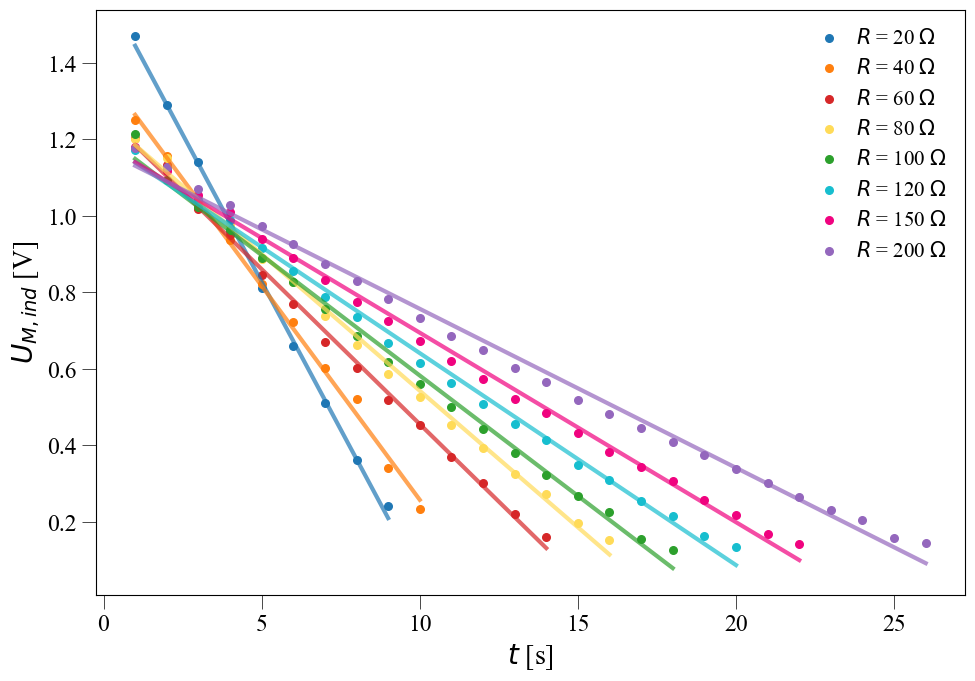

In [1839]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F', '#9467bd']

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$t$ [s]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$U_{M, ind}$ [V]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(Ohm_20[0], Ohm_20['U_ind'], color=colors[5], marker='o', s=30, label=r'$R$ = 20 $\Omega$')
ax.plot(Ohm_20[0], alpha_20_fit, color=colors[5], linewidth=3, alpha=0.7)

ax.scatter(Ohm_40[0], Ohm_40['U_ind'], color=colors[0], marker='o', s=30, label=r'$R$ = 40 $\Omega$')
ax.plot(Ohm_40[0], alpha_40_fit, color=colors[0], linewidth=3, alpha=0.7)

ax.scatter(Ohm_60[0], Ohm_60['U_ind'], color=colors[1], marker='o', s=30, label=r'$R$ = 60 $\Omega$')
ax.plot(Ohm_60[0], alpha_60_fit, color=colors[1], linewidth=3, alpha=0.7)

ax.scatter(Ohm_80[0], Ohm_80['U_ind'], color=colors[2], marker='o', s=30, label=r'$R$ = 80 $\Omega$')
ax.plot(Ohm_80[0], alpha_80_fit, color=colors[2], linewidth=3, alpha=0.7)

ax.scatter(Ohm_100[0], Ohm_100['U_ind'], color=colors[3], marker='o', s=30, label=r'$R$ = 100 $\Omega$')
ax.plot(Ohm_100[0], alpha_100_fit, color=colors[3], linewidth=3, alpha=0.7)

ax.scatter(Ohm_120[0], Ohm_120['U_ind'], color=colors[4], marker='o', s=30, label=r'$R$ = 120 $\Omega$')
ax.plot(Ohm_120[0], alpha_120_fit, color=colors[4], linewidth=3, alpha=0.7)

ax.scatter(Ohm_150[0], Ohm_150['U_ind'], color=colors[6], marker='o', s=30, label=r'$R$ = 150 $\Omega$')
ax.plot(Ohm_150[0], alpha_150_fit, color=colors[6], linewidth=3, alpha=0.7)

ax.scatter(Ohm_200[0], Ohm_200['U_ind'], color=colors[7], marker='o', s=30, label=r'$R$ = 200 $\Omega$')
ax.plot(Ohm_200[0], alpha_200_fit, color=colors[7], linewidth=3, alpha=0.7)

ax.legend(frameon=False, loc="upper right", fontsize=15, ncol=1, handletextpad=0.3)

plt.show() 

fig.savefig('images/alpha.png', bbox_inches='tight')

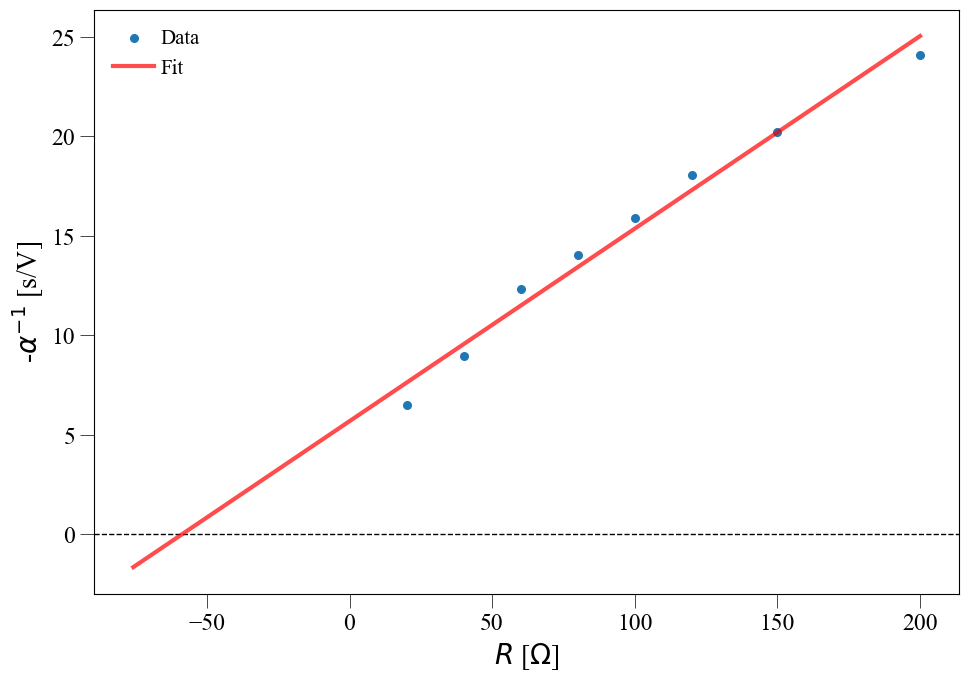

In [1840]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$R$ [$\Omega$]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"-$\alpha^{-1}$ [s/V]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.axhline(y=0, color='black', linewidth=1.0, linestyle='--')
# ax.axvline(x=-58.7, color='black', linewidth=1.0, linestyle='--')

ax.scatter(R_list, alpha_list, color=colors[5], marker='o', s=30, label='Data')
ax.plot(R_values, A_fit, color='red', linewidth=3, label='Fit', alpha=0.7)

handles, labels = ax.get_legend_handles_labels()
order = [0,1]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper left", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/alpha_2.png', bbox_inches='tight')